In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("owid-covid-data.csv")
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Checking structure and missing values
print(df.columns)
print(df.info())
print(df.isnull().sum().sort_values(ascending=False))

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# Filter for selected countries
countries = ['Kenya', 'China', 'India', 'South Africa', 'Nigeria']
df = df[df['location'].isin(countries)]

# Convert date
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df.fillna(0, inplace=True)

# Check cleaned data
df.head()
                           

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
73670,CHN,Asia,China,2020-01-05,1.0,1.0,0.0,0.0,0.0,0.0,...,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
73671,CHN,Asia,China,2020-01-06,1.0,0.0,0.0,0.0,0.0,0.0,...,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
73672,CHN,Asia,China,2020-01-07,1.0,0.0,0.0,0.0,0.0,0.0,...,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
73673,CHN,Asia,China,2020-01-08,1.0,0.0,0.0,0.0,0.0,0.0,...,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
73674,CHN,Asia,China,2020-01-09,1.0,0.0,0.0,0.0,0.0,0.0,...,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0


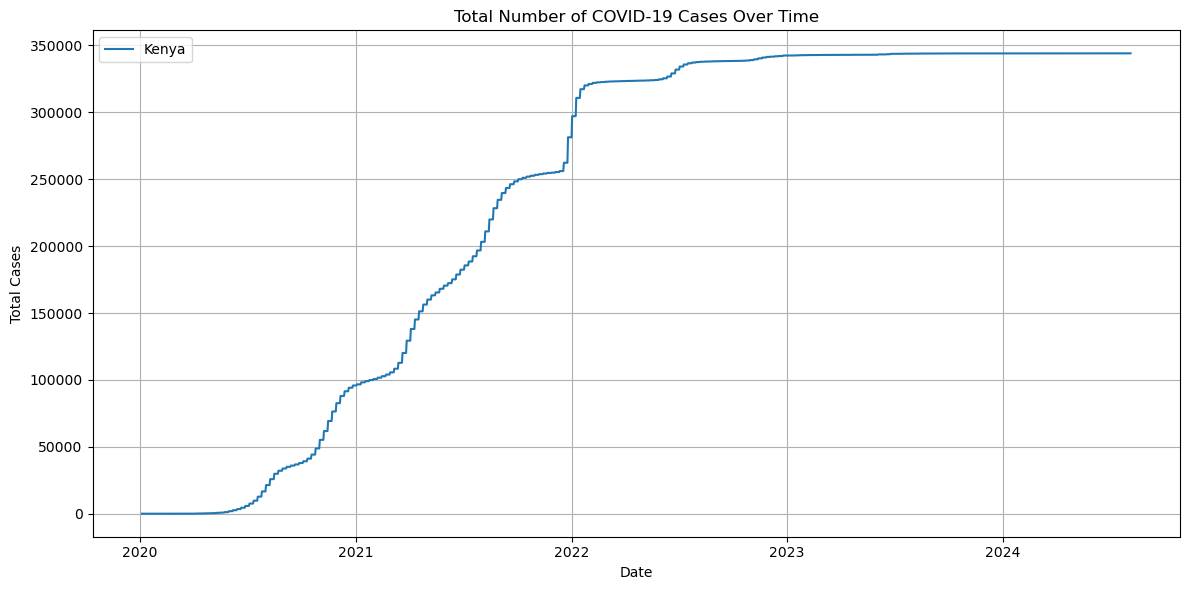

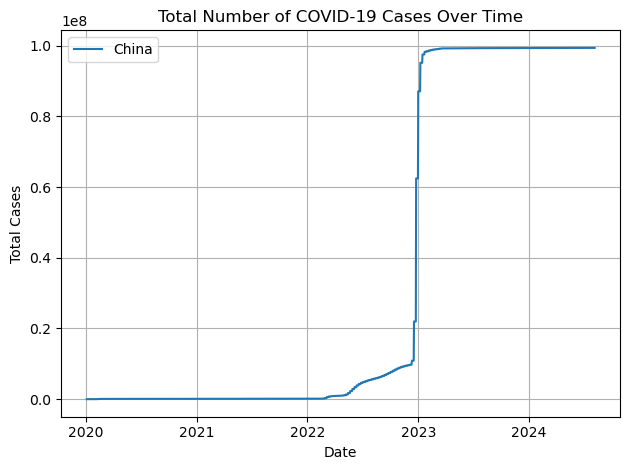

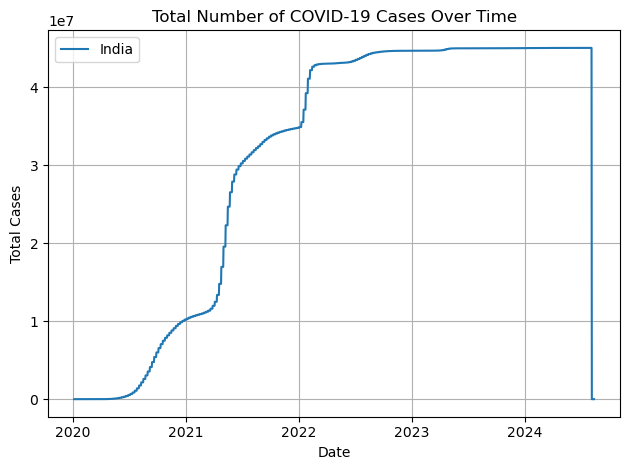

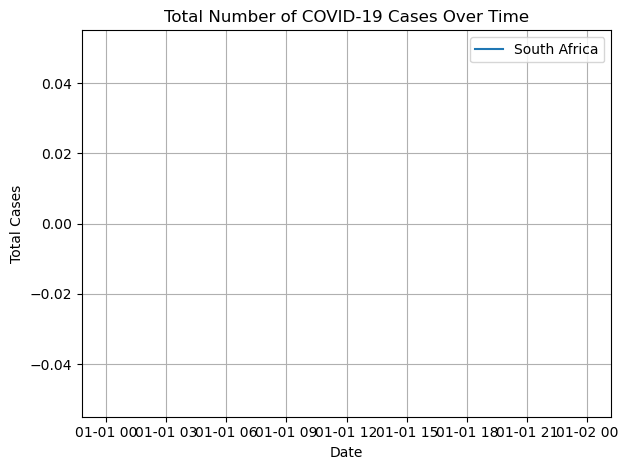

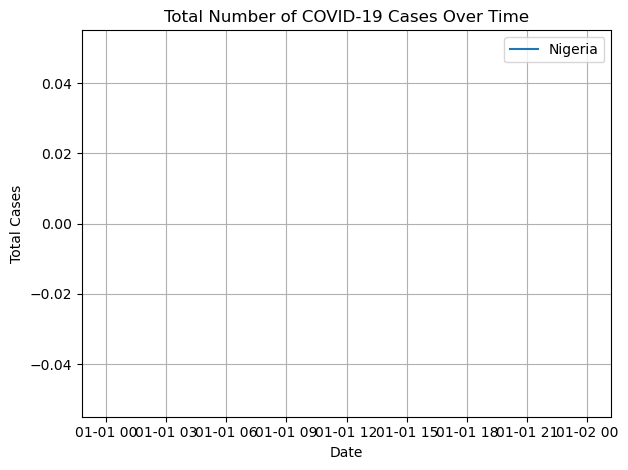

In [6]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'],
            data['total_cases'], label=country)
    plt.title('Total Number of COVID-19 Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

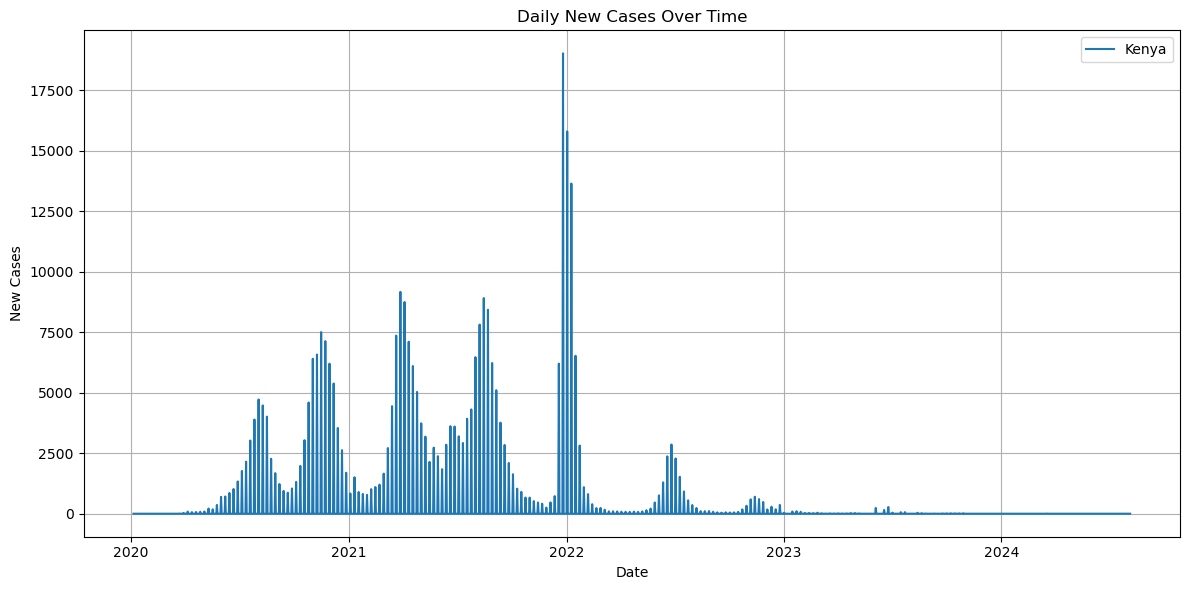

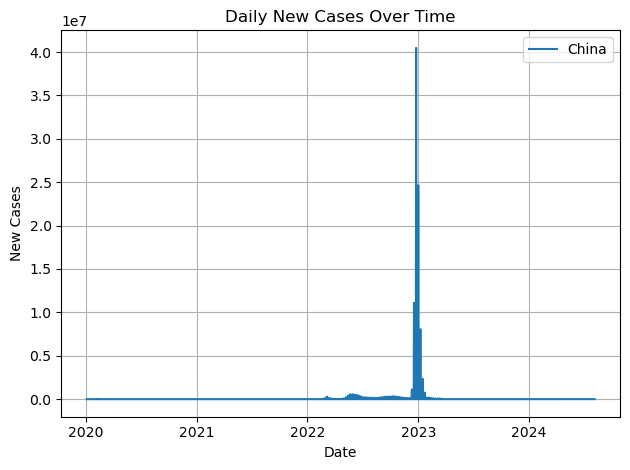

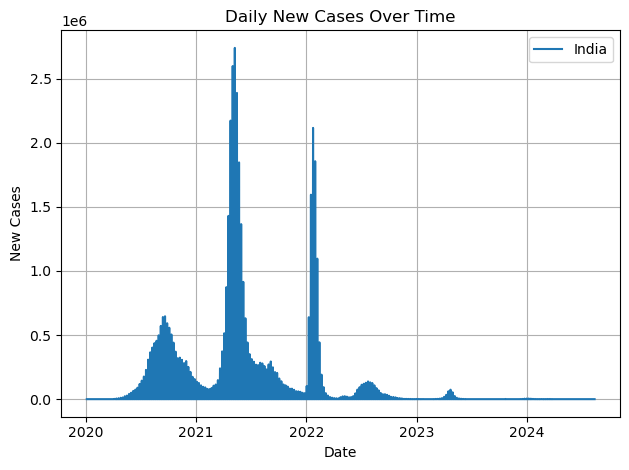

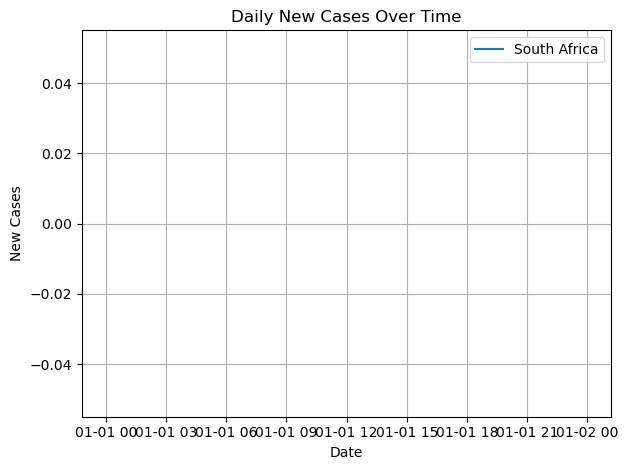

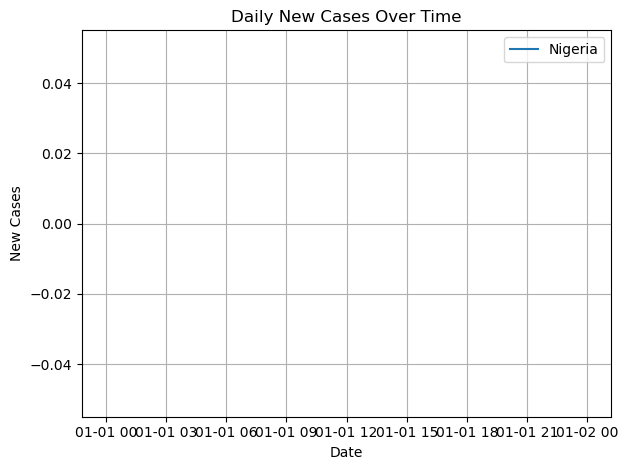

In [7]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'],
            data['new_cases'], label=country)
    plt.title('Daily New Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

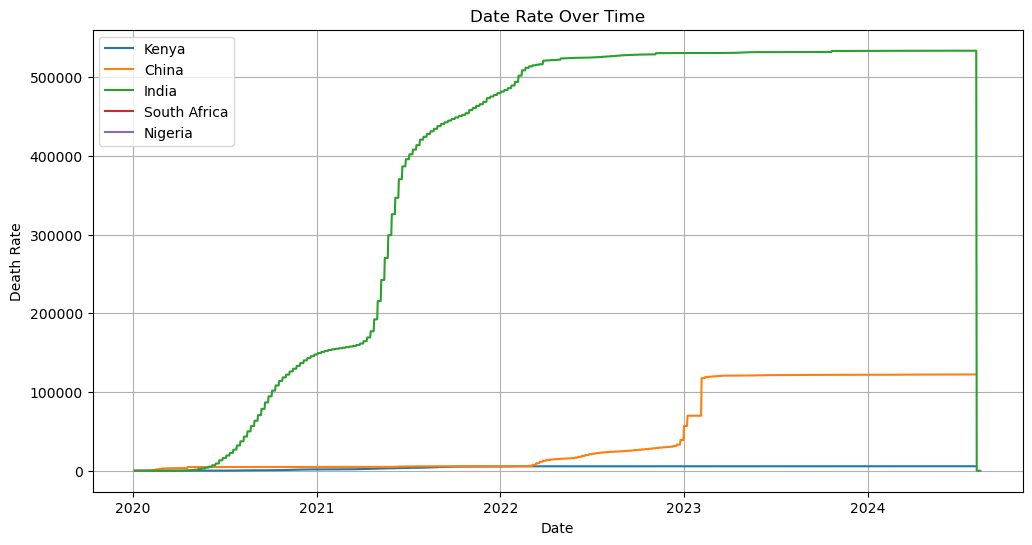

In [12]:
df['death_rate'] = df['total_deaths']
df['total_cases']
df['death_rate']
df['death_rate'].fillna(0)

# Plot death rate for one country
plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'],
            data['death_rate'], label=country)

plt.title('Date Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

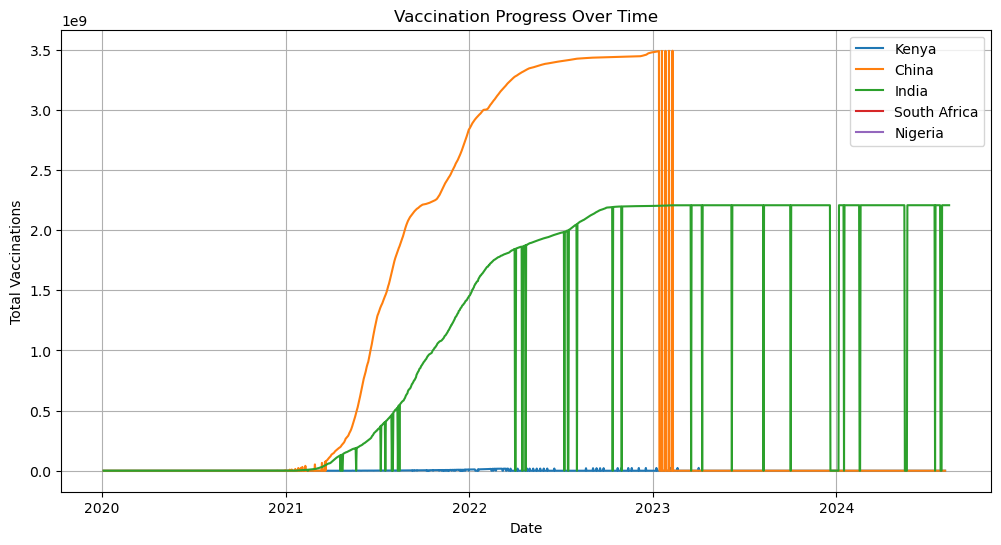

In [13]:
# Vaccination process 
plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'],
            data['total_vaccinations'], label=country)

plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

In [24]:
Markdown

- China has the highest vaccination uptake, followed by India.
- India has highest death rate
- china has the highest number of cases

SyntaxError: invalid syntax (1432450655.py, line 3)